# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data copy/Mouse_metadata.csv"
study_results_path = "data copy/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_complete.head()


In [2]:
mouse_complete.shape

(1893, 8)

In [15]:
# Checking the number of mice.
mouse_count =len(mouse_complete['Mouse ID'].unique())
mouse_count

#mouse_complete['Mouse ID'].value_counts()

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

index_mouse_complete = mouse_complete.set_index('Mouse ID')
index_mouse_complete.loc['g989']

#duplicates = mouse_complete[mouse_complete.duplicates(subset=['Mouse ID','Timepoint'],keep=False)]
#duplicates 

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_complete = index_mouse_complete.drop(['g989'])
clean_mouse_complete.shape #using shape to check rows/columns in new df and confirm that the duplicate rows are removed


(1880, 7)

In [18]:
new_mouse_complete = clean_mouse_complete.reset_index() # resetting mouse id as a column
# Checking the number of mice in the clean DataFrame.
new_mouse_complete['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = new_mouse_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = new_mouse_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_var = new_mouse_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std = new_mouse_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = new_mouse_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

statistic_table = pd.DataFrame({
                                   'Mean Tumor Volume': tumor_mean,
                                   'Median Tumor Volume': tumor_median,
                                   'Tumor Volume Variance': tumor_var,
                                   'Tumor Volume Standard Deviation': tumor_std,
                                   'Tumor Volume Standard Err': tumor_sem,
                                  })
statistic_table
    

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
#A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution) 

# Using the aggregation method, produce the same summary statistics in a single line
# lump all stats in one function calculated on grouped drug regimen(usegroup by to group them)

statistic_table2 = new_mouse_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median', 'var','std','sem'])
statistic_table2 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

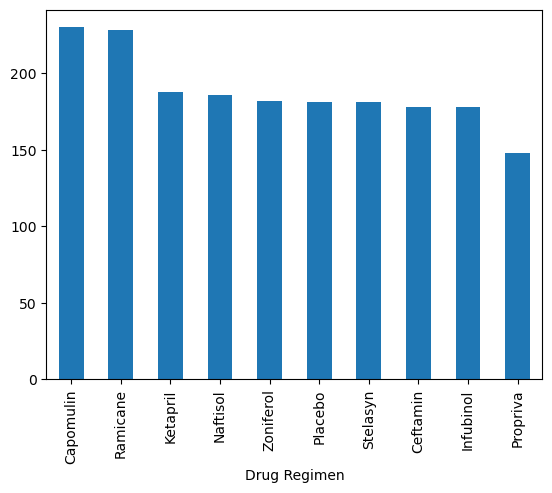

In [21]:
#Define axises knowing each needs to be grouped 
#x = new_mouse_complete.groupby (['Drug Regimen'])
#y = new_mouse_complete.groupby(['Timepoint']) and count with count function

#mouse_timepoint(x,y).plot(kind='bar')

mouse_timepoint = new_mouse_complete.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
mouse_timepoint.plot.bar()

plt.show()
#looks like some sorting in the answer??


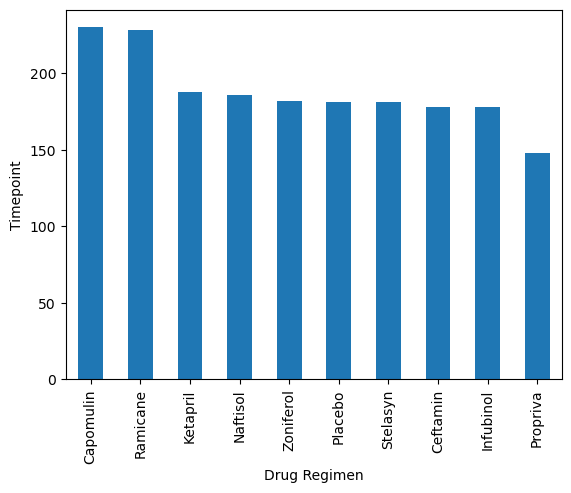

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoint.plot.bar()
plt.ylabel('Timepoint') # define y label
plt.xlabel('Drug Regimen') # define x label

plt.show()


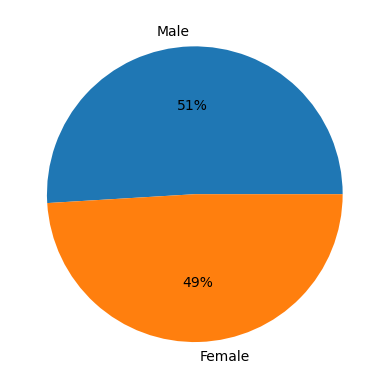

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = new_mouse_complete['Sex'].value_counts()
sex_count.plot.pie(autopct='%1.0f%%')
plt.ylabel('')
plt.show()


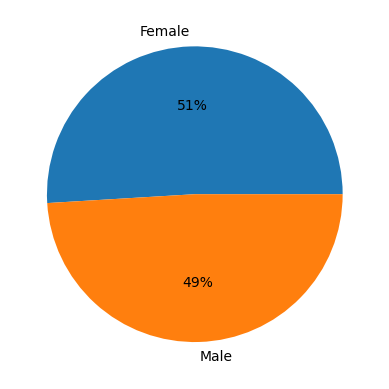

In [12]:
#make labels
sex_type= new_mouse_complete['Sex'].value_counts()
labels= ['Female', 'Male']

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_type, labels=labels, autopct="%1.0f%%")
# Create axes which are equal so we have a perfect circle
plt.axis=()



## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = new_mouse_complete.groupby("Mouse ID")["Timepoint"].max()
max_timepoints_df = pd.DataFrame(max_timepoints)#converting into a df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(new_mouse_complete,max_timepoints_df, on=["Mouse ID", "Timepoint"], how="right")
final_tumor_vol

# get only the rows with the treatments requested
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#final_tumor_vol = final_tumor_vol[final_tumor_vol["Drug Regimen"].isin(treatments)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


#for treatment = final_tumor_vol[final_tumor_vol["Drug Regimen"] == treatments]
for treatment in treatments:
    treatment = final_tumor_vol[final_tumor_vol["Drug Regimen"] == treatment]
    tumor_volume = treatment["Tumor Volume (mm3)"] #rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(tumor_volume) # add subset 
    

# Calculate the quartiles and IQR
#quartiles = new_mouse_complete ['tumor_volume'].quantile([0.25, 0.5, 0.75])
quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq - lowerq

    
# Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

print (f'Values below{lower_bound} could be outliers')
print (f'Values above{upper_bound} could be outliers')


print(f'Lower: {lowerq}')
print(f'Upper: {upperq}')
print(f'iqr: {iqr}')

    

Values below25.355449580000002 could be outliers
Values above87.66645829999999 could be outliers
Lower: 48.72207785
Upper: 64.29983003
iqr: 15.577752179999997


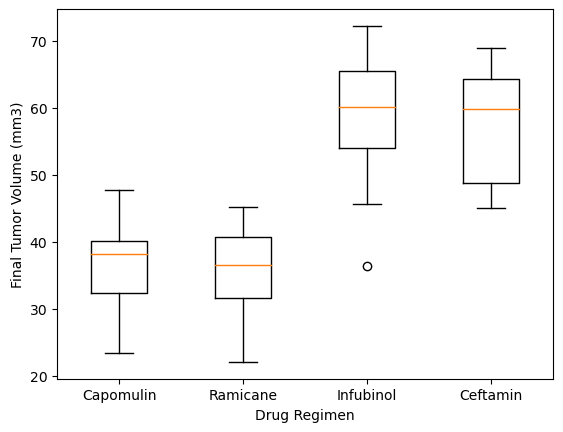

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

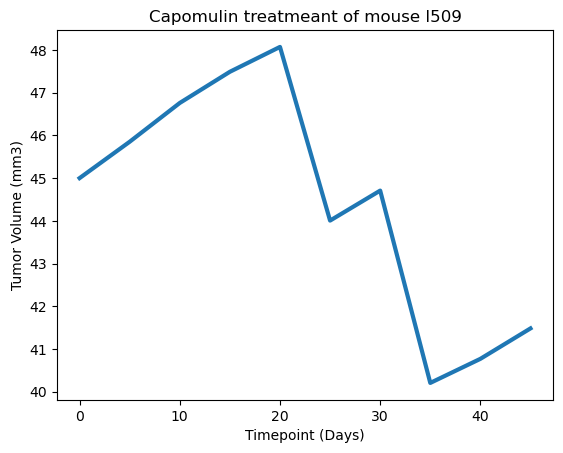

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#create a dataframe with specific mouse
line_plot_df = new_mouse_complete.loc[new_mouse_complete["Mouse ID"] == "l509",:]
line_plot_df

#defining the axises
x_axis= line_plot_df['Timepoint']
y_axis= line_plot_df['Tumor Volume (mm3)']


plt.title('Capomulin treatmeant of mouse l509') # created title

plt.plot(x_axis,y_axis,linewidth= 3, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

/var/folders/bd/x2jrlg252d9_l73ymyn7s6xr0000gn/T/ipykernel_84578/484348657.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = scatplt_df.groupby(['Mouse ID']).mean()


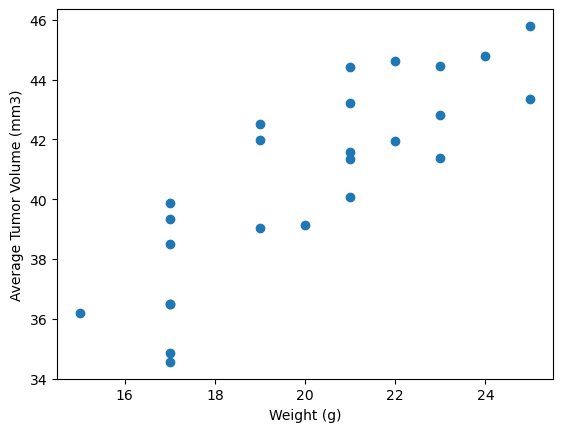

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatplt_df = new_mouse_complete.loc[new_mouse_complete["Drug Regimen"] == "Capomulin",:]

# use groupby() and mean() to create a dataframe
capavg = scatplt_df.groupby(['Mouse ID']).mean()

#defining axes
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
capavg



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.525699555207717


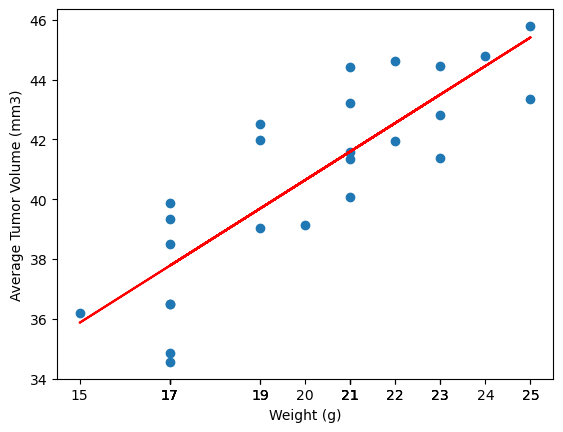

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = new_mouse_complete[new_mouse_complete['Drug Regimen'] =='Capomulin']

#average tumor volume per mouse
mouse_avg_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#weight per mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#linear creation
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mouse_weight, mouse_avg_vol)
m_fit = m_slope*mouse_weight + m_int

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
r, p = st.pearsonr(capomulin_data ['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print('The correlation between mouse weight and the average tumor volume is:', r)

#create scatter and plotline
plt.scatter(mouse_weight, mouse_avg_vol)
plt.plot(mouse_weight, m_fit, color ="red")
plt.xticks(mouse_weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
